<a href="https://colab.research.google.com/github/guard1000/SKT_AI_WG/blob/master/%5BAIWG%5D_OCR_RNN_CTC_Chaptch_Cracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://keras.io/examples/vision/captcha_ocr/


# Check GPU Machine

In [1]:
# 할당된 GPU 확인 가능
!nvidia-smi

Mon Oct  4 06:44:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load Packages

In [2]:
import os
import cv2 ###
from glob import glob
import numpy as np ### 
import matplotlib.pyplot as plt  ###
import tensorflow as tf  ####
from tensorflow import keras
from tensorflow.keras import layers

# Download Dataset

In [3]:
!wget https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
!unzip -q captcha_images_v2.zip

--2021-10-04 06:44:52--  https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip [following]
--2021-10-04 06:44:52--  https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9075967 (8.7M) [application/zip]
Saving to: ‘captcha_images_v2.zip’

captcha_images_v2.z 100%[===================>]   8.66M  --.-KB/s    in 0.1s    

2021-10-04 06:44:53 (90.2 MB/s) - ‘captcha_images_v2.zip’

# Preview Dataset

In [4]:
img_list = glob('captcha_images_v2/*.png')

len(img_list)

1040

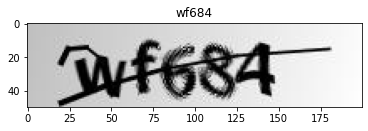

In [7]:
img = cv2.imread(img_list[0]) # 이미지 opencv로 읽어보기

label = os.path.splitext(os.path.basename(img_list[0]))[0] # 이름의 확장자를 빼서 추출

plt.title(label)
plt.imshow(img)

# Preprocessing

In [9]:
imgs = []
labels = []
max_length = 0

for img_path in img_list:
  imgs.append(img_path)

  # 경로 중 확장자 분리하여 이름을 labels에 저장
  label = os.path.splitext(os.path.basename(img_path))[0]
  labels.append(label)

  # label의 최대 길이는 max_length에 저장
  if len(label) > max_length:
    max_length = len(label)

print(len(imgs), len(labels), max_length)

1040 1040 5


In [10]:
''.join(labels)

'wf6844ycexncw4gf75cxx76mng8gnd32cnn53mn8c5xnex6b5mdnxdpncyx8gbxyy3cpwb245y5cnwyc2bg48cpc8c2pfpn865wmenn7nmmy5n6ng6nx74226e6pne2mg2nwg2m4dw3we8dxnp8c24ng7562cg58pwebmm257656ncx8y63fyf3473bx8643xfenbmx74d22mbgb48n7meby7d75m448b78eec3p67nn4wwnefgx5xmcym678w3wc2bdenpw288bgxmgdwbb4d7cdw8d3e72cd4dgf758pnp2mpnn28x47c8fxygy5bf5n245x2cnnby5y3mc8w2yd3m3bn5mw3nnpwn8fp6fbp2c7738725w53bny23d22bdmwxwpbmxpeg247wwddcpx8e8n7w67m7yf62bm3p8mggce373gbnfd8gdcnp8m6n4x5yxgpx4pnpbp6mw6e554fp762gnc3nfg7mg3x5fmxc68n7cgym76n7ppme86md344e84n24gycbdmw8nefe62c4mcmbdbb3x7547xcmbp57b27fwxdpn4b4m5mcy7gw53mdeep5bcwnnbe6npf83pnyxd7mcnmnngf2g47634yfw3b2cy3nwpn7pnmmfm6fcmemgcfgp2g7nmfy2ndpdyc834fxmxfg65f2fgeneggn2b827xf5g7x4f7ggn2xyy33nmg888xc86mdmpmy567deye2d66nfg237p852f4wfne7nx4ngn26xfgxbpmd3wf2m8n7xd5m8n4n843p5dn5w5gpe4xnx458wndyfenbfx56cwxefnbfwb4ncnbw44w3fbxdcm6ybegxmp4exnn5x7x58ypdnn2by7ne325g55b4ddcddm67b3dw6mnedwnypbpgc6mn8n7dgc2cen5572m6f2npg6wwmn68684m33p4ennfx3pwn5exynccfncnbw46epc8n8c6g45wm457dmye68gfxccm74d

In [11]:
# labels에 사용된 모든 문자를 찾아내기 - set 중복제거
# 총 19개 문자 활용
characters = set(''.join(labels))
characters

{'2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y'}

# Encode Labels

In [12]:
# 위 라벨의 문자들을 모두 숫자로 바꾸어주고자 할 때 - 케라스의 StringLookup 활용하면 알아서 해 줌
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(characters), num_oov_indices=0, mask_token=None # oov는 0으로 지정
)

# 디코딩을 위해 (숫자 -> 문자) Inverse도 생성해 줌
num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), num_oov_indices=0, mask_token=None, invert=True
)

print(labels[0])
encoded = char_to_num(tf.strings.unicode_split(labels[0], input_encoding='UTF-8'))
print(encoded)

wf684
tf.Tensor([11 12  5 16  9], shape=(5,), dtype=int64)


In [14]:
# 위 encoded가 다시 디코드가 되는지 확인
# 맨 뒤에 numpy() 까지만 하면 byte array 형태로 나오기에 utf-8로 변경
tf.strings.reduce_join(num_to_char(encoded)).numpy().decode('utf-8')

'wf684'

# Split Dataset

In [16]:
from sklearn.model_selection import train_test_split

# Train, Test Split - 90 대 10으로 분리, 셔플 수행
x_train, x_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.1, random_state=2021)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

936 936
104 104


# Create Data Generator

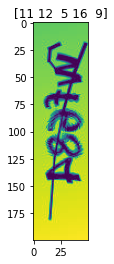

In [18]:
# 이미지 사이즈 setting 
# but, 실제로 모델에는 Transpose해서 세로가 길게 넣어줄 것임. - 이유는 앞글자부터 모델이 분석하기 위함
img_width = 200
img_height = 50

def encode_single_sample(img_path, label):
  # 1. Read image
  img = tf.io.read_file(img_path)
  # 2. Decode and convert to grayscale - 1채널 이미지로 변경
  img = tf.io.decode_png(img, channels=1)
  # 3. Convert to float32 in [0, 1] range (기존엔 unsigned integer 8비트 형태였음)
  img = tf.image.convert_image_dtype(img, tf.float32)
  # 4. Resize to the desired size - 위에 지정한 크기로
  img = tf.image.resize(img, [img_height, img_width])
  # 5. Transpose the image because we want the time - Transpose해서 세로 길이가 길게 만들어 줌
  # dimension to correspond to the width of the image.
  img = tf.transpose(img, perm=[1, 0, 2])
  # 6. Map the characters in label to numbers - 앞서 만들어 준 char_to_num으로 인코딩
  label = char_to_num(tf.strings.unicode_split(label, input_encoding='UTF-8'))
  # 7. Return a dict as our model is expecting two inputs
  return {'image': img, 'label': label}

preview = encode_single_sample(imgs[0], labels[0])

plt.title(str(preview['label'].numpy()))
plt.imshow(preview['image'].numpy().squeeze())

In [19]:
# 모델에 Feed 시킬 데이터 셋 생성하기
# 배치 사이즈를 지정한 후, 테네서플로에서 제공하는 tf.data의 Dataset에 넣어주면 
# 알아서 모델에 Feed시키기 좋은 형태로 만들어 줌 (코든는 쿡북매뉴얼 그대로, 매개변수명만 바꿔 사용) 
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

print(train_dataset)
print(validation_dataset)

<PrefetchDataset shapes: {image: (None, 200, 50, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>
<PrefetchDataset shapes: {image: (None, 200, 50, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>


# Model

In [20]:
# 모델에서 활용할 CTC 손실함수.
# 모델설명은 https://ratsgo.github.io/speechbook/docs/neuralam/ctc
# -- 요약: 음성분석에서 많이 사용되던 방식으로, OCR에서도 성능이 좋다고 함.
# --   RNN의 순차학습 강점이 있는데, 세그먼트 작업이 리소스가 많이 들어서 어려움이 있었음
# --   음성분석 그래프를 unsegmented data 그 자체로 바로 학습할 수 없을까? 해서 나온 모델
# --   아래 코드는 텐서플로 문서 tf.keras.backend.ctc_batch_cost 그대로.

class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
        input_length = tf.cast(tf.shape(y_pred)[1], dtype='int64')
        label_length = tf.cast(tf.shape(y_true)[1], dtype='int64')

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype='int64')

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


# 모델 쌓기
def build_model():
    # Inputs to the model
    input_img = layers.Input(
        # Shape은 앞서 지정한 가로, 세로, 그레이스케일이므로 1, float32 형식
        shape=(img_width, img_height, 1), name='image', dtype='float32'
    )
    # 라벨은 몇글자일지 모르므로 shape을 None으로 초기화
    labels = layers.Input(name='label', shape=(None,), dtype='float32')

    # 2개의 Convolution 레이어를 추가해 줌
    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv1',
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name='pool1')(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv2',
    )(x)
    x = layers.MaxPooling2D((2, 2), name='pool2')(x)

    # We have used two max pool with pool size and strides 2. -> 맥스 풀링 2번 수행하므로, 차원이 4분에 1로 줄어들게 됨
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before -> 2번째 Conv 레이어에서 필터를 64로 지정했으므로!
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x) # Reshaping
    x = layers.Dense(64, activation='relu', name='dense1')(x) # 마지막 Dense layer 하나 추가
    x = layers.Dropout(0.2)(x) # Dropout

    # RNNs - Bidirectional LSTM 2개 활용 노드갯수 128, 64개 짜리
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer 마지막 Dense Layer에는 사용한 단어의 갯수 +1 로, Activation은 Softmax로 처리 
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation='softmax', name='dense2'
    )(x)

    # CTC로스 추가 - CTC 레이어에 레이블과 output layer인 x를 넣어줌
    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name='ctc_loss')(labels, x)

    # Define the model - 위에서 설계한 모델을 정의
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name='ocr_model_v1'
    )
    # Optimizer - Adam
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

# Summary를 보면, input으로 (200,50,1)인 것들이 들어가고
# 아웃풋으로 dense2 (20글자 : 19글자 + oov 1) 가 나오게 됨

Model: "ocr_model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 200, 50, 1)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 200, 50, 32)  320         image[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 100, 25, 32)  0           Conv1[0][0]                      
__________________________________________________________________________________________________
Conv2 (Conv2D)                  (None, 100, 25, 64)  18496       pool1[0][0]                      
_______________________________________________________________________________________

# Train

In [21]:
# 트레이닝 - 콜백으론 얼리스탑잉 하나 추가
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100
30/30 [==============================] - 44s 179ms/step - loss: 25.7037 - val_loss: 16.5685
Epoch 2/100
30/30 [==============================] - 4s 118ms/step - loss: 16.3552 - val_loss: 16.3272
Epoch 3/100
30/30 [==============================] - 4s 118ms/step - loss: 16.3143 - val_loss: 16.3261
Epoch 4/100
30/30 [==============================] - 4s 117ms/step - loss: 16.3117 - val_loss: 16.3266
Epoch 5/100
30/30 [==============================] - 4s 117ms/step - loss: 16.3148 - val_loss: 16.3264
Epoch 6/100
30/30 [==============================] - 4s 119ms/step - loss: 16.3126 - val_loss: 16.3313
Epoch 7/100
30/30 [==============================] - 4s 118ms/step - loss: 16.3144 - val_loss: 16.3253
Epoch 8/100
30/30 [==============================] - 4s 119ms/step - loss: 16.3110 - val_loss: 16.3262
Epoch 9/100
30/30 [==============================] - 4s 119ms/step - loss: 16.3028 - val_loss: 16.3273
Epoch 10/100
30/30 [==============================] - 4s 118ms/step - lo

# Test Inference

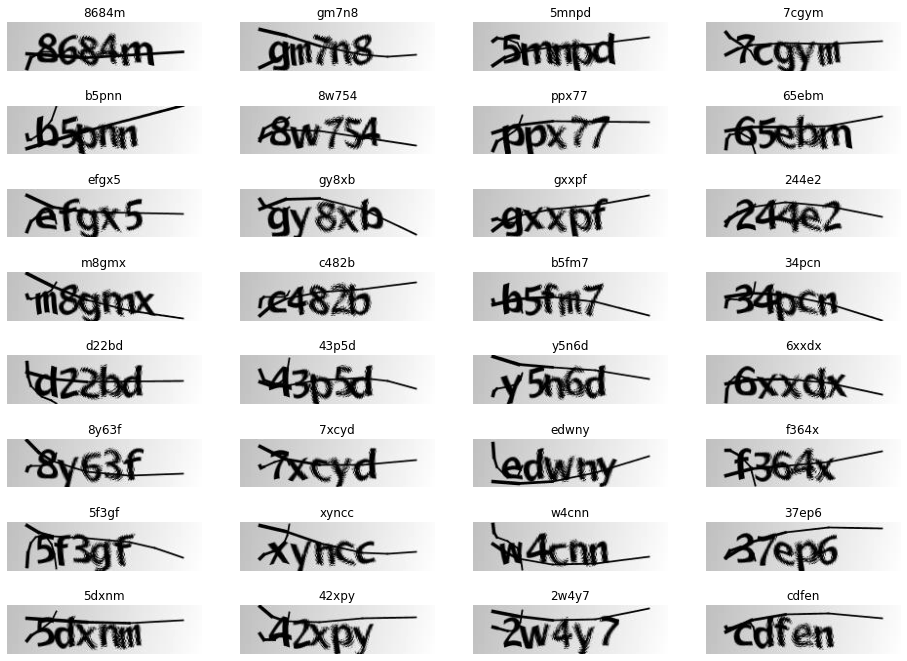

In [22]:
# 테스트 모델에는 CTC 모델은 빼고, 라벨을 아웃풋으로 내도록 함
prediction_model = keras.models.Model(
  model.get_layer(name='image').input, model.get_layer(name='dense2').output
)

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    # Batch Prediction 하는 부분. 그리디 서치보다 성능이 좋아야 한다면 Beam Search를 활용해 보라고 함
    # ctc_decode 문서를 참조
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    # output을 받아낸 후, 초반에 정의해 두었던 num_to_char 로 해석
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode('utf-8')
        output_text.append(res)
    return output_text

# Validation Set에서 첫번째 배치(32개) 를 받아서 모델에 추론시켜 보기
for batch in validation_dataset.take(1):
    batch_images = batch['image']

    preds = prediction_model.predict(batch_images)

    # 모델 추론 결과를 위에 정의한 decode_batch_predictions로 해석
    pred_texts = decode_batch_predictions(preds)

    _, axes = plt.subplots(8, 4, figsize=(16, 12))

    # 결과 확인
    for img, text, ax in zip(batch_images, pred_texts, axes.flatten()):
        img = img.numpy().squeeze()
        img = img.T # 이미지가 Transpose 되어있었으니, 다시 Transpose해서 확인

        ax.imshow(img, cmap='gray')
        ax.set_title(text)
        ax.set_axis_off()